# 23장 AI가 문맥을 파악하는 원리

## <목차>

- **23-1. 단어 간 유사성 측정하기**  
- **23-2. 단어들 사이의 관계 파악하기**  
- **23-3. 단어 사이의 관계 수정하기**  
- **23-4. AI가 문맥을 파악하는 법**  
- **23-5. 질문(쿼리), 단서(키), 답변(밸류)**  
- **23-6. 트랜스포머를 위한 어텐션 만들기**  




[<img src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" align="left"/> ](https://colab.research.google.com/github/taehojo/deeplearning_4th/blob/master/colab/ch23-colab.ipynb)


## 23-1 단어 간 유사성 측정하기

### 단어 임베딩: AI가 언어를 이해하는 첫 단계

단어 임베딩은 자연어처리에서 가장 기본이 되는 개념입니다. 컴퓨터는 텍스트를 직접 이해할 수 없기 때문에, 단어를 숫자로 표현해야 합니다. 즉, 텍스트 데이터를 벡터라는 수치 형태로 변환하는 과정이 필요합니다.

임베딩 벡터는 단어의 의미적 관계를 수학적으로 표현합니다. 의미가 비슷한 단어들은 벡터 공간에서 서로 가까운 위치에 놓이게 됩니다. 예를 들어 '사과'와 '배'는 모두 과일이므로 벡터 공간에서 가까이 위치하게 됩니다.

### 컴퓨터가 알아 들을 수 있도록 수치 형태로 변환하기

아래 코드에서는 과일(귤, 딸기, 수박)과 감정 표현(미소짓다, 화내다, 웃다)을 2차원 벡터로 표현했습니다. 실제 자연어처리에서는 보통 수백 차원의 벡터를 사용하지만, 이해를 위해 2차원으로 간단히 표현했습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

#출력해 보기
for word, vec in word_embeddings.items():
    print(f"'{word}'의 임베딩 벡터: {vec}")

'귤'의 임베딩 벡터: [0 6]
'딸기'의 임베딩 벡터: [0 5]
'수박'의 임베딩 벡터: [1 6]
'미소짓다'의 임베딩 벡터: [6 1]
'화내다'의 임베딩 벡터: [6 0]
'웃다'의 임베딩 벡터: [5 0]


위 코드에서 볼 수 있듯이, 각 단어는 2차원 벡터로 표현됩니다. 첫 번째 차원은 단어가 얼마나 감정 표현에 가까운지를, 두 번째 차원은 얼마나 과일에 가까운지를 나타냅니다. 이렇게 벡터로 표현함으로써 컴퓨터는 단어 간의 관계를 수학적으로 계산할 수 있게 됩니다.

### 단어를 시각화 하기

단어 임베딩을 시각화하면 단어 간의 관계를 직관적으로 파악할 수 있습니다. 아래 코드는 각 단어 벡터를 2차원 평면에 표시합니다.

/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46392 (\N{HANGUL SYLLABLE DDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-pac

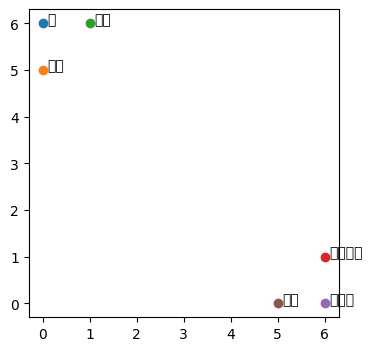

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 단어와 임베딩 벡터 정의
word_embeddings = {
    '귤': np.array([0, 6]),
    '딸기': np.array([0, 5]),
    '수박': np.array([1, 6]),
    '미소짓다': np.array([6, 1]),
    '화내다': np.array([6, 0]),
    '웃다': np.array([5, 0])
}

# 단어 임베딩을 시각화해 봅니다.
plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word)
plt.show()

시각화 결과를 보면, 과일 관련 단어(귤, 딸기, 수박)는 그래프의 위쪽에 모여 있고, 감정 표현 단어(미소짓다, 화내다, 웃다)는 오른쪽에 모여 있는 것을 볼 수 있습니다. 이처럼 의미적으로 유사한 단어들은 벡터 공간에서도 서로 가까이 위치하게 됩니다.

임베딩 공간에서 단어들 사이의 거리는 의미적 유사성을 반영합니다. 이 거리를 측정하는 방법은 다음 섹션에서 살펴보겠습니다.

## 23-2 단어들 사이의 관계 파악하기

### 임베딩 벡터로 단어 간 유사도 계산하기

단어를 벡터로 표현했다면, 다음 단계는 이 벡터들 사이의 관계를 수학적으로 계산하는 것입니다. 단어 간 유사도를 계산하는 가장 기본적인 방법은 내적(dot product)을 사용하는 것입니다.

### 내적 계산하기

내적은 두 벡터의 각 차원별 값을 곱한 후 모두 더하는 연산입니다. 내적 값이 클수록 두 벡터(단어)가 유사하다고 볼 수 있습니다.

In [3]:
def dot_product(vec1, vec2):
    return np.dot(vec1, vec2)

# 예제 단어들 사이의 내적 계산
print("귤 • 딸기:", dot_product(word_embeddings['귤'], word_embeddings['딸기']))
print("귤 • 웃다:", dot_product(word_embeddings['귤'], word_embeddings['웃다']))

귤 • 딸기: 30
귤 • 웃다: 0


위 코드의 결과를 보면, '귤'과 '딸기'의 내적은 30으로 상당히 높은 값을 가집니다. 이는 두 단어가 의미적으로 유사함을 나타냅니다. 반면, '귤'과 '웃다'의 내적은 0으로, 이 두 단어는 의미적으로 관련이 없음을 보여줍니다.

내적은 간단하지만 벡터의 크기에 영향을 받는다는 단점이 있습니다. 이 문제를 해결하기 위해 코사인 유사도를 사용합니다.

### 코사인 유사도 계산하기

코사인 유사도는 벡터의 크기에 영향을 받지 않고 오직 벡터의 방향만을 고려하는 유사도 측정 방법입니다. 코사인 유사도는 -1(완전히 반대)부터 1(완전히 동일) 사이의 값을 가집니다.

In [4]:
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

words = list(word_embeddings.keys())
embedding_vectors = np.array(list(word_embeddings.values()))

# 코사인 유사성 계산
similarities = []
for v1 in embedding_vectors:
    row = []
    for v2 in embedding_vectors:
        row.append(cosine_similarity(v1, v2))
    similarities.append(row)

# 결과 출력
for i in range(len(words)):
    for j in range(len(words)):
        print(f"{words[i]} • {words[j]} 유사성: {similarities[i][j]:.2f}")

귤 • 귤 유사성: 1.00
귤 • 딸기 유사성: 1.00
귤 • 수박 유사성: 0.99
귤 • 미소짓다 유사성: 0.16
귤 • 화내다 유사성: 0.00
귤 • 웃다 유사성: 0.00
딸기 • 귤 유사성: 1.00
딸기 • 딸기 유사성: 1.00
딸기 • 수박 유사성: 0.99
딸기 • 미소짓다 유사성: 0.16
딸기 • 화내다 유사성: 0.00
딸기 • 웃다 유사성: 0.00
수박 • 귤 유사성: 0.99
수박 • 딸기 유사성: 0.99
수박 • 수박 유사성: 1.00
수박 • 미소짓다 유사성: 0.32
수박 • 화내다 유사성: 0.16
수박 • 웃다 유사성: 0.16
미소짓다 • 귤 유사성: 0.16
미소짓다 • 딸기 유사성: 0.16
미소짓다 • 수박 유사성: 0.32
미소짓다 • 미소짓다 유사성: 1.00
미소짓다 • 화내다 유사성: 0.99
미소짓다 • 웃다 유사성: 0.99
화내다 • 귤 유사성: 0.00
화내다 • 딸기 유사성: 0.00
화내다 • 수박 유사성: 0.16
화내다 • 미소짓다 유사성: 0.99
화내다 • 화내다 유사성: 1.00
화내다 • 웃다 유사성: 1.00
웃다 • 귤 유사성: 0.00
웃다 • 딸기 유사성: 0.00
웃다 • 수박 유사성: 0.16
웃다 • 미소짓다 유사성: 0.99
웃다 • 화내다 유사성: 1.00
웃다 • 웃다 유사성: 1.00


코사인 유사도 계산 결과를 보면, 과일들 사이(귤-딸기, 귤-수박, 딸기-수박)와 감정 표현들 사이(미소짓다-화내다, 미소짓다-웃다, 화내다-웃다)의 유사도가 높은 것을 확인할 수 있습니다. 반면, 과일과 감정 표현 사이의 유사도는 낮습니다.

이러한 유사도 계산은 단어 추천, 의미 검색, 단어 간 관계 파악 등 다양한 자연어처리 작업의 기초가 됩니다. 특히 단어 임베딩의 가장 큰 장점은 "왕 - 남자 + 여자 = 여왕"과 같은 단어 벡터 연산이 가능하다는 점인데, 이는 다음 섹션에서 살펴보겠습니다.

## 23-3 단어 사이의 관계 수정하기

### 문맥에 따른 단어 의미 변화 이해하기

자연어에서 단어의 의미는 문맥에 따라 달라질 수 있습니다. 예를 들어, '사과'라는 단어는 과일을 의미할 수도 있고, 잘못을 인정하고 용서를 구하는 행위를 의미할 수도 있습니다. 현대 AI 모델은 이러한 문맥 의존적 의미를 파악하기 위해 단어 임베딩을 문맥에 따라 동적으로 조정합니다.

### 관계 업데이트

아래 코드에서는 '사과'라는 단어의 의미를 과일 쪽으로 또는 행위 쪽으로 조정하는 방법을 보여줍니다.

In [5]:
def update_vector(vector, target_vector, similarity_value, learning_rate):
    new_vector = vector + learning_rate * (target_vector - vector) * similarity_value
    return new_vector

# 기존 딕셔너리에 추가
word_embeddings['사과'] = np.array([3, 3])  # '사과' 초기 값 추가
word_embeddings['과'] = np.array([0, 0])    # '과' 벡터 추가

# 벡터 값 가져오기
귤 = word_embeddings['귤']
사과 = word_embeddings['사과']
과 = word_embeddings['과']

# '귤과 사과' 문장의 각 단어별 코사인 유사도
cosine_귤_사과 = cosine_similarity(귤, 사과)
cosine_과_사과 = cosine_similarity(과, 사과)

# 학습률1의 예
learning_rate1 = 0.47

# '사과' 벡터를 '귤' 쪽으로 업데이트
print(f"업데이트 이전의 사과 벡터 (사과_?): {사과}")
사과_과일 = update_vector(사과, 귤, cosine_귤_사과, learning_rate1)
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")

업데이트 이전의 사과 벡터 (사과_?): [3 3]
업데이트된 사과 벡터 (사과_과일): [2.00297944 3.99702056]


/var/folders/k8/xzy6lbhd1zz_kl7_542fzclm0000gn/T/ipykernel_32628/756846971.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


위 코드에서 `update_vector` 함수는 단어 벡터를 특정 방향으로 조정합니다. 초기에 '사과'는 [3, 3]으로 중립적인 위치에 있지만, '귤' 쪽으로 업데이트하면 과일의 의미가 강해집니다.

`learning_rate`는 얼마나 크게 벡터를 업데이트할지 결정하는 파라미터로, 값이 클수록 더 많이 조정됩니다. `similarity_value`는 현재 두 단어 간의 유사도로, 유사할수록 더 많이 업데이트됩니다.

### 다양한 문맥에서의 단어 의미 변화

다음 코드는 '사과'라는 단어가 문맥에 따라 어떻게 다른 의미로 해석될 수 있는지 보여줍니다.

업데이트 이전의 사과 벡터 (사과_?): [3 3]
업데이트된 사과 벡터 (사과_과일): [2.00297944 3.99702056]
업데이트된 사과 벡터 (사과_행위): [3.99067604 2.00932396]


/var/folders/k8/xzy6lbhd1zz_kl7_542fzclm0000gn/T/ipykernel_32628/4197913998.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return dot_product / (norm_v1 * norm_v2)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/string/opt/anaconda3/envs/crawler-arm/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

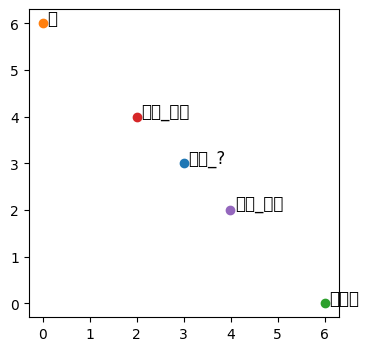

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 벡터값 설정
사과 = np.array([3, 3])
귤 = np.array([0, 6])
과 = np.array([0, 0])
을 = np.array([0, 0])
어제일 = np.array([6, 0])

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

def update_vector(vector, target_vector, similarity_value, learning_rate):
    new_vector = vector + learning_rate * (target_vector - vector) * similarity_value
    return new_vector

# '귤과 사과' 문장의 각 단어별 코사인 유사도
cosine_귤_사과 = cosine_similarity(귤, 사과)
cosine_과_사과 = cosine_similarity(과, 사과)

# 학습률1을 설정하겠습니다.
learning_rate1 = 0.47

# '사과' 벡터를 '귤' 쪽으로 업데이트
print(f"업데이트 이전의 사과 벡터 (사과_?): {사과}")
사과_과일 = update_vector(사과, 귤, cosine_귤_사과, learning_rate1)
print(f"업데이트된 사과 벡터 (사과_과일): {사과_과일}")

# '어제일을 사과' 문장의 각 단어별 코사인 유사도
cosine_어제일_사과 = cosine_similarity(어제일, 사과_과일)
cosine_을_사과 = cosine_similarity(을, 사과_과일)

# 학습률2를 설정하겠습니다.
learning_rate2 = 1.11

# '사과' 벡터를 '어제일' 쪽으로 업데이트
사과_행위 = update_vector(사과_과일, 어제일, cosine_어제일_사과, learning_rate2)
print(f"업데이트된 사과 벡터 (사과_행위): {사과_행위}")

# 단어 임베딩 시각화
word_embeddings = {
    "사과_?": 사과,
    "귤": 귤,
    "어제일": 어제일,
    "사과_과일": 사과_과일,
    "사과_행위": 사과_행위
}

plt.figure(figsize=(4, 4))
for word, vec in word_embeddings.items():
    plt.scatter(*vec)
    plt.text(vec[0] + 0.1, vec[1], word, fontsize=12)

plt.show()

위 코드에서는 다음과 같은 두 가지 문맥에서 '사과'의 의미를 조정했습니다:

1. "귤과 사과" - 여기서 '사과'는 과일 의미로 사용됩니다.
2. "어제일을 사과" - 여기서 '사과'는 잘못을 인정하고 용서를 구하는 행위로 사용됩니다.

시각화 결과를 보면 초기의 중립적인 '사과_?'가 문맥에 따라 '사과_과일'(위쪽, 과일 영역) 또는 '사과_행위'(오른쪽, 행위 영역)로 이동한 것을 확인할 수 있습니다.

이렇게 단어의 의미를 문맥에 따라 동적으로 조정하는 능력은 현대 자연어처리 모델의 핵심 기능입니다. 특히 BERT, GPT 같은 트랜스포머 기반 모델들은 이러한 문맥적 의미 파악을 위해 어텐션 메커니즘을 사용하는데, 이는 다음 섹션에서 더 자세히 살펴보겠습니다.

## 23-4 AI가 문맥을 파악하는 법

### 트랜스포머: 현대 AI의 문맥 파악 기술

지금까지 우리는 단어 임베딩과 단어 간 관계를 살펴보았습니다. 이제 현대 AI가 어떻게 문맥을 파악하는지 알아보겠습니다. 현재 자연어처리 분야를 지배하고 있는 아키텍처는 '트랜스포머(Transformer)'입니다. 트랜스포머는 2017년 Google에서 발표한 "Attention is All You Need" 논문에서 소개되었으며, GPT, BERT와 같은 대형 언어 모델들의 기반이 되었습니다.

트랜스포머의 핵심은 '어텐션(Attention)' 메커니즘입니다. 어텐션은 모델이 문장 내 모든 단어 사이의 관계를 동시에 파악할 수 있게 해주는 기술입니다.

### 임베딩 행렬의 형태

트랜스포머 모델에서는 문장의 각 단어를 벡터로 변환한 후, 이를 행렬 형태로 모읍니다. 아래 코드에서는 4개 토큰으로 이루어진 문장("커피 한잔 어때")을 512차원 벡터로 임베딩하는 과정을 보여줍니다.

In [7]:
# import numpy as np

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
# 실제로는 사전 훈련된 임베딩 벡터를 사용하는 것이 일반적입니다.
embedding_dict = {
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

# 입력 문장
sentence = ['커피', '한잔', '어때']
max_len = 4  # 최대 문장 길이
tokens = sentence + ['PAD'] * (max_len - len(sentence))  # 패딩 적용

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([embedding_dict[token] for token in tokens])
print("임베딩 행렬의 형태:", embeddings.shape)  # (4, 512)

임베딩 행렬의 형태: (4, 512)


위 코드는 4개의 토큰(3개 단어 + 1개 패딩)을 각각 512차원 벡터로 표현하여 (4, 512) 형태의 행렬을 만듭니다. 패딩(PAD)은 서로 다른 길이의 문장을 동일한 형태로 처리하기 위해 사용됩니다.

### 멀티 헤드 어텐션

트랜스포머의 핵심 아이디어 중 하나는 '멀티 헤드 어텐션'입니다. 이는 하나의 어텐션 메커니즘을 사용하는 대신, 여러 개의 어텐션 헤드를 사용하여 다양한 관점에서 문맥을 파악하는 방법입니다.

In [8]:
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원

# 임베딩을 8개의 헤드로 분할
heads = np.split(embeddings, num_heads, axis=1)
print("각 헤드의 형태:", heads[0].shape)  # (4, 64)

각 헤드의 형태: (4, 64)


임베딩 벡터를 8개의 헤드로 나누면, 각 헤드는 (4, 64) 형태가 됩니다. 각 헤드는 서로 다른 관점에서 문맥을 파악하는 역할을 합니다.

### 어텐션 계산 과정

트랜스포머에서 어텐션은 세 가지 복사본을 만들어 계산합니다. 이를 쿼리(Query), 키(Key), 밸류(Value)라고 부릅니다. 이들의 내적을 계산하여 단어 간 관계를 파악합니다.

In [9]:
# 첫 번째 헤드 선택
head_1 = heads[0]

# 복사1과 복사2 생성
copy1 = head_1
copy2 = head_1.T

# 내적 계산
attention_scores = np.dot(copy1, copy2)
print("내적 결과 행렬의 형태:", attention_scores.shape)  # (4, 4)

내적 결과 행렬의 형태: (4, 4)


내적 계산 결과는 (4, 4) 형태의 행렬이 됩니다. 이 행렬은 문장 내 모든 단어 쌍 사이의 관계 점수를 나타냅니다. 예를 들어, (0, 1) 위치의 값은 첫 번째 단어('커피')와 두 번째 단어('한잔') 사이의 관계 점수입니다.

### 밸류 벡터와의 결합

어텐션 점수가 계산되면, 이를 밸류 벡터와 결합하여 문맥이 반영된 새로운 표현을 생성합니다.

In [10]:
# 복사3 생성
copy3 = embeddings[:, :head_dim]

# 다시 4x64 형태로 변환
restored_head = np.dot(attention_scores, copy3)
print("복원된 헤드의 형태:", restored_head.shape)  # (4, 64)

복원된 헤드의 형태: (4, 64)


어텐션 점수 행렬과 밸류 벡터를 곱하면, 각 단어의 표현이 문맥을 반영하여 업데이트됩니다. 이렇게 생성된 새로운 표현은 원래와 같은 (4, 64) 형태를 갖습니다.

### 최종 출력

모든 헤드에서 이 과정을 반복한 후, 결과를 결합하여 최종 출력을 생성합니다.

In [11]:
restored_heads = []

for i in range(num_heads):
    head = heads[i]
    copy1 = head
    copy2 = head.T
    attention_scores = np.dot(copy1, copy2)
    copy3 = embeddings[:, i*head_dim:(i+1)*head_dim]
    restored_head = np.dot(attention_scores, copy3)
    restored_heads.append(restored_head)

# 모든 헤드를 결합하여 원래 차원으로 복원
final_output = np.concatenate(restored_heads, axis=1)
print("최종 출력 행렬의 형태:", final_output.shape)  # (4, 512)

최종 출력 행렬의 형태: (4, 512)


각 헤드에서 생성된 결과를 결합하면 원래와 같은 (4, 512) 형태의 행렬이 됩니다. 하지만 이제 각 단어의 표현은 문장 내 다른 단어들과의 관계를 반영하고 있습니다. 예를 들어, '사과'라는 단어가 '먹다'와 함께 등장했다면, '사과'의 임베딩은 과일로서의 의미가 강화됩니다.

이러한 방식으로 트랜스포머 모델은 단어들 사이의 관계를 파악하고, 문맥에 따라 단어의 의미를 동적으로 조정할 수 있습니다. 이는 "나는 사과를 먹었다"와 "나는 실수를 사과했다"에서 '사과'의 다른 의미를 파악하는 데 도움이 됩니다.

다음 섹션에서는 트랜스포머의 핵심 구성 요소인 쿼리, 키, 밸류에 대해 더 자세히 알아보겠습니다.

## 23-5 질문(쿼리), 단서(키), 답변(밸류)

### 어텐션 메커니즘의 핵심 구성 요소

앞서 트랜스포머 모델이 어텐션 메커니즘을 통해 문맥을 파악한다고 설명했습니다. 이제 어텐션의 핵심 구성 요소인 쿼리(Query), 키(Key), 밸류(Value)에 대해 더 자세히 알아보겠습니다.

쿼리, 키, 밸류는 인간의 정보 검색 과정을 모방한 개념입니다. 간단히 비유하자면:

- **쿼리(Query)**: 우리가 찾고자 하는 정보나 질문입니다. 예를 들어 "오늘 날씨는?"
- **키(Key)**: 찾고자 하는 정보의 위치나 단서입니다. 예를 들어 책의 색인이나 인터넷 검색에서의 키워드
- **밸류(Value)**: 실제 정보 내용입니다. 예를 들어 "오늘은 맑고 화창합니다."

트랜스포머에서는 쿼리, 키, 밸류를 각각 행렬 연산을 통해 생성합니다. 이들은 모두 동일한 임베딩 벡터에서 시작하지만, 서로 다른 가중치 행렬과의 곱셈을 통해 다른 역할을 수행하게 됩니다.

### 쿼리, 키, 밸류 행렬 초기화

아래 코드는 쿼리, 키, 밸류 행렬을 초기화하는 과정을 보여줍니다:

In [12]:
# 쿼리, 키, 밸류 행렬 초기화
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=1)
queries = heads.copy()
keys = [head.T for head in heads]
values = heads.copy()

print("쿼리 행렬의 형태:", queries[0].shape)  # (4, 64)
print("키 행렬의 형태:", keys[0].shape)  # (64, 4)
print("밸류 행렬의 형태:", values[0].shape)  # (4, 64)

쿼리 행렬의 형태: (4, 64)
키 행렬의 형태: (64, 4)
밸류 행렬의 형태: (4, 64)


- **쿼리(Queries)**: 각 단어가 다른 단어들에 대해 물어보는 질문입니다. 형태는 (문장 길이, 헤드 차원)
- **키(Keys)**: 각 단어가 쿼리에 대해 제공하는 답변의 "관련성"입니다. 형태는 (헤드 차원, 문장 길이)
- **밸류(Values)**: 실제 정보 내용으로, 쿼리와 관련된 키를 통해 가져오는 값입니다. 형태는 (문장 길이, 헤드 차원)

### 어텐션 점수 계산 및 스케일링

쿼리와 키의 내적을 계산하여 어텐션 점수를 구합니다. 이 점수는 각 단어가 다른 단어에 얼마나 "주목"해야 하는지를 나타냅니다.

In [13]:
# 스케일링 전
attention_scores = np.dot(queries[0], keys[0])
print("스케일링 전 어텐션 스코어:")
print(attention_scores)

# 스케일링을 위한 헤드 차원의 제곱근 계산
scaling_factor = np.sqrt(head_dim)

# 스케일링 후
scaled_attention_scores = attention_scores / scaling_factor
print("스케일링 후 어텐션 스코어:")
print(scaled_attention_scores)

스케일링 전 어텐션 스코어:
[[24.15812898 13.4829892  16.65117987  0.        ]
 [13.4829892  17.05270352 12.38579217  0.        ]
 [16.65117987 12.38579217 21.32437889  0.        ]
 [ 0.          0.          0.          0.        ]]
스케일링 후 어텐션 스코어:
[[3.01976612 1.68537365 2.08139748 0.        ]
 [1.68537365 2.13158794 1.54822402 0.        ]
 [2.08139748 1.54822402 2.66554736 0.        ]
 [0.         0.         0.         0.        ]]


어텐션 점수는 차원이 커질수록 값이 커지는 경향이 있어, 소프트맥스 함수가 극단적인 값을 갖게 될 수 있습니다. 이를 방지하기 위해 헤드 차원의 제곱근으로 나누는 스케일링 작업을 수행합니다.

### 소프트맥스 적용 및 마스킹

스케일링된 어텐션 점수에 소프트맥스 함수를 적용하여 확률 분포로 변환합니다. 이 확률 분포는 각 단어가 다른 단어에 얼마나 주목해야 하는지의 가중치가 됩니다.

또한, 패딩 토큰에는 주목하지 않도록 마스킹 작업을 수행합니다.

In [14]:
# 패딩 부분을 -∞로 채운 마스크 행렬 준비
mask = np.zeros_like(scaled_attention_scores)
mask[:, -1] = -np.inf  # 마지막 열을 패딩 처리
mask[-1, :] = -np.inf  # 마지막 행을 패딩 처리

# 소프트맥스 적용 함수
def masked_softmax(x, mask):
    x_exp = np.exp(x - np.max(x, axis=-1, keepdims=True))  # 오버플로 방지
    x_exp = x_exp * (mask != -np.inf)  # 마스크된 부분은 0으로 처리
    x_sum = np.sum(x_exp, axis=-1, keepdims=True) # 지수 값의 합 계산
    x_sum = np.where(x_sum == 0, 1, x_sum)  # 0으로 나누는 것을 방지하기 위해 합이 0인 경우 1로 설정
    return x_exp / x_sum # 소프트맥스 계산

# 소프트맥스 적용
attention_probs = masked_softmax(scaled_attention_scores, mask)
print("소프트맥스 적용 후 어텐션 스코어:")
print(attention_probs)

소프트맥스 적용 후 어텐션 스코어:
[[0.60438163 0.15914462 0.23647375 0.        ]
 [0.29118643 0.45494567 0.25386791 0.        ]
 [0.29583999 0.17358116 0.53057886 0.        ]
 [0.         0.         0.         0.        ]]


마스킹은 패딩 토큰과 같이 실제 의미가 없는 토큰에 주목하지 않도록 하는 기법입니다. 마스킹된 위치의 값을 -무한대로 설정하면 소프트맥스 적용 후 해당 위치의 확률은 0이 됩니다.

### 최종 어텐션 출력 계산

소프트맥스로 변환된 어텐션 확률과 밸류 행렬을 곱하여 최종 어텐션 출력을 계산합니다. 이 출력은 각 단어가 문맥 내 다른 단어들의 정보를 얼마나 반영해야 하는지를 나타냅니다.

In [15]:
# 최종 어텐션 출력 계산 (소프트맥스 확률 * 밸류)
attention_output = np.matmul(attention_probs, values[0])
print("어텐션 출력의 형태:", attention_output.shape)  # (4, 64)

어텐션 출력의 형태: (4, 64)


이 과정을 통해 각 단어의 표현은 문맥 내 다른 단어들의 정보를 반영하여 업데이트됩니다. 예를 들어, "은행에 갔다"라는 문장에서 '은행'이라는 단어는 '갔다'라는 단어와의 관계를 통해 금융 기관으로서의 의미가 강화될 수 있습니다.

### 트랜스포머의 자기 주의 메커니즘

트랜스포머의 어텐션은 "자기 주의(Self-Attention)" 메커니즘이라고도 불립니다. 이는 같은 문장 내에서 단어들이 서로를 참조하기 때문입니다. 이 메커니즘을 통해 모델은 문장 내의 장거리 의존성을 효과적으로 처리할 수 있습니다.

자기 주의 메커니즘은 인간이 문장을 이해하는 방식과 유사합니다. 우리도 문장을 읽을 때 현재 단어의 의미를 파악하기 위해 문장 내 다른 단어들을 참조합니다. 트랜스포머는 이러한 인간의 인지 과정을 수학적으로 모델링한 것입니다.

다음 섹션에서는 여러 문장에 대한 트랜스포머 어텐션을 적용하는 방법을 살펴보겠습니다.

## 23-6 트랜스포머를 위한 어텐션 만들기

### 실제 문장들에 트랜스포머 적용하기

지금까지 우리는 트랜스포머의 기본 원리와 어텐션 메커니즘의 작동 방식을 살펴보았습니다. 이제 실제 여러 문장에 트랜스포머를 적용하는 방법을 알아보겠습니다.

실제 자연어처리 모델에서는 한 번에의 여러 문장(배치)을 처리합니다. 이는 계산 효율성을 높이고 모델의 학습 속도를 향상시킵니다. 따라서 어텐션 메커니즘도 여러 문장을 동시에 처리할 수 있어야 합니다.

### 여러 문장의 임베딩

여러 문장을 임베딩하면 3차원 텐서가 됩니다: (배치 크기, 문장 길이, 임베딩 차원)

In [16]:
# 입력 문장
sentences = [
    ['<sos>', '커피', '한잔', '어때', '<eos>'],
    ['<sos>', '오늘', '날씨', '좋네', '<eos>'],
    ['<sos>', '옷이', '어울려요', '<eos>', 'PAD']
]

# 단어와 해당 임베딩 벡터를 딕셔너리로 정의합니다.
embedding_dict = {
    '<sos>': np.random.rand(512),
    '<eos>': np.random.rand(512),
    '커피': np.random.rand(512),
    '한잔': np.random.rand(512),
    '어때': np.random.rand(512),
    '오늘': np.random.rand(512),
    '날씨': np.random.rand(512),
    '좋네': np.random.rand(512),
    '옷이': np.random.rand(512),
    '어울려요': np.random.rand(512),
    'PAD': np.zeros(512)  # 패딩 벡터는 0으로 채웁니다.
}

max_len = 5  # 최대 문장 길이

# 토큰을 임베딩 벡터로 변환
embeddings = np.array([[embedding_dict[token] for token in sentence] for sentence in sentences])
print("임베딩 행렬의 형태:", embeddings.shape)  # (3, 5, 512)

임베딩 행렬의 형태: (3, 5, 512)


위 코드에서는 3개의 문장을 각각 5개의 토큰으로 표현하고, 각 토큰을 512차원 벡터로 임베딩합니다. 결과는 (3, 5, 512) 형태의 3차원 텐서입니다.

* 첫 번째 차원(3): 배치 크기, 즉 처리하는 문장의 수
* 두 번째 차원(5): 각 문장의 최대 길이
* 세 번째 차원(512): 임베딩 벡터의 차원

실제 모델에서는 문장의 시작(`<sos>`)과 끝(`<eos>`)을 나타내는 특수 토큰을 추가하고, 짧은 문장은 패딩 토큰(`PAD`)으로 채웁니다.

### 여러 문장에서의 쿼리, 키, 밸류 계산

배치 처리를 위해 쿼리, 키, 밸류도 3차원 텐서로 확장됩니다.

In [17]:
# 쿼리, 키, 밸류 행렬 초기화
num_heads = 8
head_dim = 512 // num_heads  # 각 헤드의 차원
heads = np.split(embeddings, num_heads, axis=2) # 512차원 임베딩 벡터를 8개의 헤드로 분할하여 heads에 저장
queries = heads.copy()
keys = [head.transpose(0, 2, 1) for head in heads] # 키 행렬을 각 헤드의 전치를 통해 초기화 (첫 번째 축: 배치 크기, 두 번째 축: 문장 길이, 세 번째 축: 헤드 차원)
values = heads.copy()

print("쿼리 행렬의 형태:", queries[0].shape)  # (3, 5, 64)
print("키 행렬의 형태:", keys[0].shape)  # (3, 64, 5)
print("밸류 행렬의 형태:", values[0].shape)  # (3, 5, 64)

쿼리 행렬의 형태: (3, 5, 64)
키 행렬의 형태: (3, 64, 5)
밸류 행렬의 형태: (3, 5, 64)


여기서 주목할 점은 키 행렬의 형태가 (3, 64, 5)인데, 이는 전치 연산을 통해 두 번째와 세 번째 차원이 바뀌었기 때문입니다. 이렇게 하면 쿼리와 키의 내적이 (3, 5, 5) 형태의 어텐션 점수 행렬이 됩니다.

### 배치 처리를 위한 어텐션 계산

이제 배치 내 모든 문장에 대해 어텐션을 동시에 계산합니다. 이 과정은 앞서 설명한 단일 문장에 대한 어텐션 계산과 유사하지만, 배치 차원을 추가로 고려해야 합니다.

1. 쿼리와 키의 내적 계산
2. 스케일링 적용
3. 패딩 마스킹
4. 소프트맥스 적용
5. 밸류와의 곱셈

In [18]:
# 전체 코드 실행 예시
import numpy as np

# 전체 출력 형식을 소수점 이하 네 자리로 설정
np.set_printoptions(precision=4, suppress=True)

# 각 헤드별 어텐션 계산
for i in range(num_heads):
    query = queries[i]
    key = keys[i]
    value = values[i]

    # 내적 계산 후 스케일링
    attention_scores = np.matmul(query, key) / scaling_factor

    # 패딩 처리
    padding_mask = np.array([[token == 'PAD' for token in sentence] for sentence in sentences])
    padding_mask = padding_mask[:, np.newaxis, :]  # 차원 확장
    attention_scores = np.where(padding_mask, -np.inf, attention_scores)

    # 소프트맥스 적용
    attention_weights = softmax(attention_scores)

    # 밸류와의 곱셈
    attention_output = np.matmul(attention_weights, value)
    
    # 이 헤드의 출력 저장
    # ...

NameError: name 'softmax' is not defined

실제 구현에서는 위 과정이 각 헤드마다 독립적으로 수행되고, 모든 헤드의 출력이 결합되어 최종 출력이 됩니다.

### 트랜스포머 모델의 완전한 구조

실제 트랜스포머 모델은 위에서 설명한 멀티헤드 어텐션 외에도 여러 구성 요소를 포함합니다:

1. **인코더-디코더 구조**: 원본 트랜스포머는 인코더와 디코더로 구성되며, 기계 번역과 같은 시퀀스-투-시퀀스 작업에 사용됩니다.

2. **위치 인코딩**: 트랜스포머는 순차적인 정보를 직접 처리하지 않기 때문에, 위치 정보를 별도로 제공해야 합니다. 위치 인코딩을 통해 단어의 순서 정보를 모델에 전달합니다.

3. **피드포워드 네트워크**: 각 어텐션 계층 후에는 일반적인 완전 연결 신경망이 있어 모델의 표현력을 높입니다.

4. **스킵 연결과 층 정규화**: 깊은 신경망의 학습을 안정화하기 위한 기법들이 적용됩니다.

### 트랜스포머의 발전과 응용

트랜스포머의 등장 이후 자연어처리 분야는 크게 발전했습니다. 특히 BERT, GPT와 같은 사전 훈련된 대형 언어 모델이 등장하면서 다양한 자연어처리 작업에서 놀라운 성능을 보여주고 있습니다.

- **BERT(Bidirectional Encoder Representations from Transformers)**: 트랜스포머의 인코더 부분만을 사용하여 양방향 문맥을 학습합니다. 문장 분류, 개체명 인식 등의 다양한 작업에 활용됩니다.

- **GPT(Generative Pre-trained Transformer)**: 트랜스포머의 디코더 부분을 기반으로 하며, 이전 토큰들을 바탕으로 다음 토큰을 예측하는 방식으로 학습합니다. 텍스트 생성, 대화 시스템 등에 활용됩니다.

- **T5(Text-to-Text Transfer Transformer)**: 모든 자연어처리 작업을 텍스트-투-텍스트 형식으로 통합하는 접근법을 제시합니다.

### 트랜스포머의 한계와 과제

트랜스포머의 뛰어난 성능에도 불구하고, 여전히 몇 가지 한계와 과제가 있습니다:

1. **계산 복잡도**: 자기 주의 메커니즘의 시간 및 공간 복잡도는 시퀀스 길이의 제곱에 비례합니다. 이는 긴 문서를 처리할 때 메모리 효율성 문제를 야기합니다.

2. **표면적 패턴 학습**: 트랜스포머 모델은 종종 텍스트의 표면적 패턴을 학습하지만, 깊은 의미 이해나 추론 능력은 제한적일 수 있습니다.

3. **학습 데이터 편향**: 대형 언어 모델은 학습 데이터의 편향을 그대로 반영할 수 있어, 윤리적 문제를 야기할 수 있습니다.

이러한 한계를 극복하기 위해 Longformer, Reformer 등의 효율적인 트랜스포머 변형이 연구되고 있으며, 추론 능력을 향상시키기 위한 다양한 접근법이 시도되고 있습니다.

### 결론

트랜스포머 모델은 어텐션 메커니즘을 통해 문맥을 효과적으로 파악할 수 있으며, 이는 현대 자연어처리의 핵심 기술이 되었습니다. 단어 임베딩부터 어텐션 메커니즘, 그리고 트랜스포머 아키텍처까지 이어지는 발전은 컴퓨터가 인간의 언어를 이해하고 생성하는 능력을 크게 향상시켰습니다.

앞으로 자연어처리 기술은 더욱 발전하여, 인간과 기계 사이의 언어 장벽을 허물고 더 자연스러운 상호작용을 가능하게 할 것입니다. 이 과정에서 트랜스포머와 어텐션 메커니즘은 계속해서 중요한 역할을 할 것입니다.

## [참고] 그림 속 폰트가 깨지면 실행하세요.

In [ ]:
import matplotlib.pyplot as plt

# Matplotlib에서 시스템 기본 폰트인 '맑은 고딕' 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 그래프 그리기
plt.plot([1, 2, 3, 4])
plt.title('한글 폰트 테스트')
plt.show()